# LỜI MỞ ĐẦU

## Lý do chọn đề tài


Hiện tại, trong bối cảnh suy thoái nền kinh tế và chưa có dấu hiệu hồi phục, tất cả các lĩnh vực kinh tế đề phải chịu nhiều sức ép do tình hình này gây ra. Đặc biệt, ngành ngân hàng đang đứng trên bờ vực khi phải đối mặt với nhiều thách thức trong việc duy trì và phát triển dịch vụ khách hàng của mình. Trong bối cảnh đó, việc giữ chân khách hàng tiếp tục sử dụng dịch vụ trở nên quan trọng hơn hết, không chỉ để duy trì mà còn để tăng uy tín và lòng trung thành của khách hàng. 

Với nhận thức về những khó khăn này, một cuộc khảo sát được thực hiện để đo lường mức độ sử dụng của khách hàng đối với thẻ tín dụng. Kết quả có đến 16.07% khách hàng đã rời bỏ. Để giải quyết vấn đề và đưa ra giải pháp, chúng em đã nghiên cứu sâu sắc với một tập dữ liệu đa dạng về thông tin khách hàng từ độ tuổi, giới tính, thu nhập,.... Tập dữ liệu không chỉ cung cấp cái nhìn tổng quan về đặc trưng của khách hàng mà còn giúp điều tra biến động của tỷ lệ khách hàng rời bỏ. 

Việc xây dựng một mô hình dự đoán chính xác đã được chúng em thực hiện trong bài làm, mặc dù có nhiều nhiễu, sự phức tạp nhưng mong rằng kết quả sẽ giúp ngân hàng có cái nhìn sâu sắc hơn về khách hàng của mình cũng như đưa ra các chiến lược thích hợp để giữ chân và tăng cường mối quan hệ với khách hàng. 


# NỘI DUNG

## I. Mô tả bộ dữ liệu 

##### Mô tả biến
1. Attrition_Flag - Cho biết tài khoản của khách hàng còn hoạt động hay đã bị khóa 
2. Customer_Age - Số tuổi của khách hàng
3. Gender - giới tính của khách hàng 
4. Dependent_count - Số người mà khách hàng bảo hộ trong gia đình
5. Education_Level - trình độ học vấn của khách hàng 
6. Marital_Status - tình trạng hôn nhân của khách hàng
7. Income_Category - Mức thu nhập của khách hàng
8. Card_Category - Loại thẻ tín dụng mà khách hàng sử dụng
9. Months_on_book - Thời gian khách hàng sử dụng dịch vụ của ngân hàng
10. Total_Relationship_Count _ Tổng số giao dịch và dịch vụ khách hàng sử dụng tại ngân hàng
11. Months_Inactive_12_mon - Số tài khoản ngừng hoạt động trong 12 tháng
12. Contacts_Count_12_mon - Số lần khách hàng liên hệ với ngân hàng
13. Credit_Limit - Kỳ hạn thẻ tín dụng 
14. Total_Revolving_Bal - Tổng số dư quay vòng cua thẻ tín dụng 
15. Avg_Open_To_Buy - Trung bình chênh lệch giữa hạn mức tín dụng và số dư hiện tại trên tài khoản 
16. Total_Amt_Chng_Q4_Q1 - Số tiền giao dịch thay đổi trong 4 quý 
17. Total_Trans_Amt - Tổng số tiền giao dịch trong 12 tháng 
18. Total_Trans_Ct - Tổng số giao dịch trong 12 tháng
19. Total_Ct_Chng_Q4_Q1 - Thay đổi số lượng giao dịch trong 4 quý  
20. Avg_Utilization_Ratio - Tỷ lệ sử dụng trung bình của thẻ tín dụng

##### import các thư viện cần dùng để mô tả dataset này.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_recall_curve,ConfusionMatrixDisplay,precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

## II. Khai phá dữ liệu 

### 2.1. Thăm dò dữ liệu (exploration data)

- **Đọc dataset và lấy 10 mẫu ngẫu nhiên từ dataset**

In [2]:
df = pd.read_csv('BankChurners.csv')
df.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
4302,715405758,Attrited Customer,50,F,1,High School,Single,Unknown,Blue,42,...,10057.0,0,10057.0,0.792,2383,42,0.448,0.000,0.981610,0.018390
3160,719912808,Existing Customer,52,M,2,High School,Single,$60K - $80K,Blue,39,...,14973.0,0,14973.0,0.706,4288,72,0.600,0.000,0.000502,0.999500
8745,713087958,Existing Customer,53,M,4,High School,Divorced,$120K +,Blue,36,...,34516.0,1337,33179.0,0.704,7919,85,0.635,0.039,0.000183,0.999820
8851,778865583,Existing Customer,46,M,3,Graduate,Married,Less than $40K,Blue,27,...,6954.0,1502,5452.0,0.624,7510,89,0.648,0.216,0.000118,0.999880
1713,714002658,Existing Customer,49,M,2,Unknown,Married,$120K +,Blue,34,...,27732.0,1623,26109.0,0.452,1413,31,0.722,0.059,0.000239,0.999760
10055,710066133,Attrited Customer,30,M,0,Graduate,Single,Less than $40K,Silver,36,...,12833.0,0,12833.0,0.853,9619,75,0.786,0.000,0.995760,0.004244
5455,721121283,Existing Customer,37,F,2,Graduate,Single,$40K - $60K,Blue,24,...,2573.0,1280,1293.0,0.718,4289,81,0.841,0.497,0.000158,0.999840
9145,713552958,Existing Customer,43,M,5,Graduate,Unknown,$60K - $80K,Blue,28,...,12773.0,1637,11136.0,0.919,14833,114,0.583,0.128,0.000112,0.999890
9746,710232483,Existing Customer,49,F,1,Uneducated,Married,Unknown,Blue,36,...,19846.0,2162,17684.0,0.602,16908,122,0.694,0.109,0.000174,0.999830
8461,715980258,Existing Customer,36,F,1,Doctorate,Single,Less than $40K,Blue,25,...,2835.0,2511,324.0,0.731,4811,77,0.925,0.886,0.000260,0.999740


- **Hiển thị các giá trị unknown**

In [3]:
df.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

- **Xóa các giá trị không xác định**

In [4]:
df_cleaned = df.dropna()

- **Hiển thị DataFrame sau khi xóa các giá trị không xác định**

In [5]:
print("BankChurners.csv")
print(df_cleaned)

BankChurners.csv
       CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_

- **Hiển thị tất cả tên cột trong dataset**

In [6]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

- **Loại bỏ các cột có tên bất thường**

In [7]:
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

- **Kiểm tra kích thước của dataset**

In [8]:
df.shape

(10127, 21)

- **Hiển thị thông tin tổng quan về dataset**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Kết quả trả về cung cấp cho chúng ta những thông tin:
- Số lượng hàng: 10127
- Số lượng cột: 21
- Hiển thị các tên cột
- Kiểu dữ liệu: float64(5), int64(10), object(6)
- Hiển thị số lượng non-null (không rỗng) của mỗi cột
- Tổng số bộ nhớ sử dụng: 1.6+ MB

**Bỏ cột CLIENTNUM vì đây là mã định danh duy nhất và không hữu ích cho các dự đoán.**

In [10]:
df = df.drop( 'CLIENTNUM', axis=1)

In [11]:
df.shape

(10127, 20)

- **Kiểm tra các giá trị trùng lặp**

In [12]:
df.duplicated().sum()

0

- **Đếm số lượng giá trị duy nhất trong mỗi cột của dữ liệu**

In [13]:
df.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

- **Phân phối dữ liệu**

In [14]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


- **Mô tả dữ liệu có kiểu dữ liệu là object**

In [15]:
df.select_dtypes(include='object').describe()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


##### **Phân tích dữ liệu thăm dò ( Exploratory Data Analysis)**

Chia các cột thành các dữ liệu định tính và định lượng 

In [16]:
categorical_features = [
    'Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
    'Income_Category', 'Card_Category'
]

numerical_features = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

- Numerical data: Dữ liệu số là những con số, không phải từ ngữ hay mô tả. Dữ liệu định lượng biểu thị các giá trị số
- Categorical data: Có thể được lưu trữ bằng tên hoặc label. Bởi vì nó xác định chất lượng dữ liệu trước khi phân loại nên đôi khi nó được gọi là dữ liệu định tính.

**Tính năng phân loại (Categorical Features).**

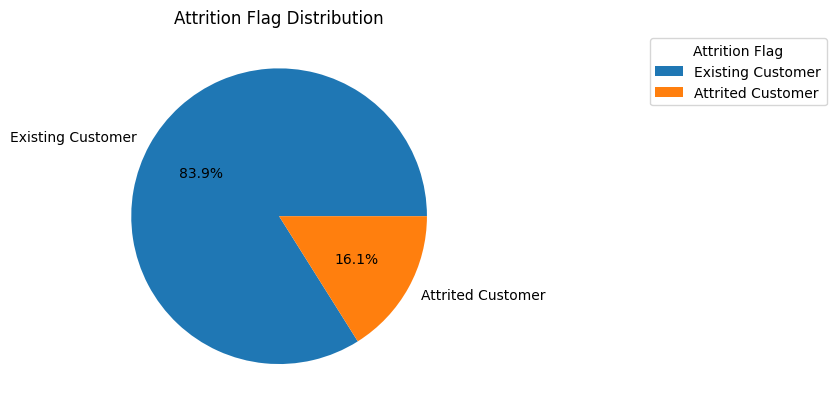

In [17]:
# Tính số lượng dữ liệu cho mỗi giá trị trong cột "Attrition_Flag"
attrition_counts = df['Attrition_Flag'].value_counts()

# Tạo biểu đồ tròn
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%') #hiển thị giá trị phần trăm với 1 chữ số sau dấu thập phân 

# Đặt tiêu đề cho biểu đồ
plt.title('Attrition Flag Distribution')

# Hiển thị chú thích
plt.legend(title='Attrition Flag', loc='upper right'
           , bbox_to_anchor=(2, 1))

# Hiển thị biểu đồ
plt.show()

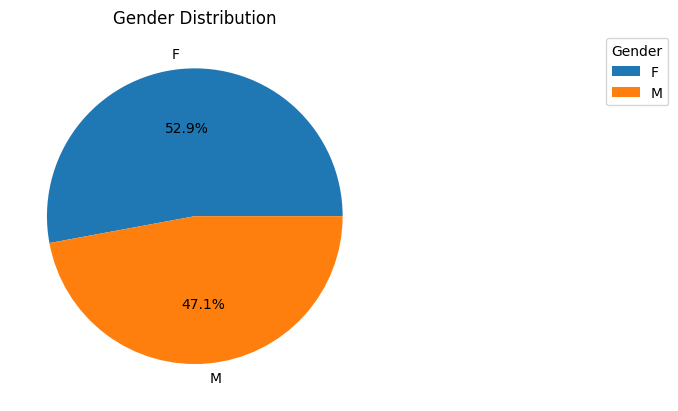

In [18]:
# Tính số lượng dữ liệu cho mỗi giá trị trong cột "Attrition_Flag"
gender_counts = df['Gender'].value_counts()

# Tạo biểu đồ tròn
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

# Đặt tiêu đề cho biểu đồ
plt.title('Gender Distribution')

# Hiển thị chú thích
plt.legend(title='Gender', bbox_to_anchor=(1.8, 1))

# Hiển thị biểu đồ
plt.show()

- var = 'Gender',...
- plt.bar(tmp['index'], tmp[var])
- plt.title(var)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\2660856456.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\2660856456.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\2660856456.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\2660856456.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotat

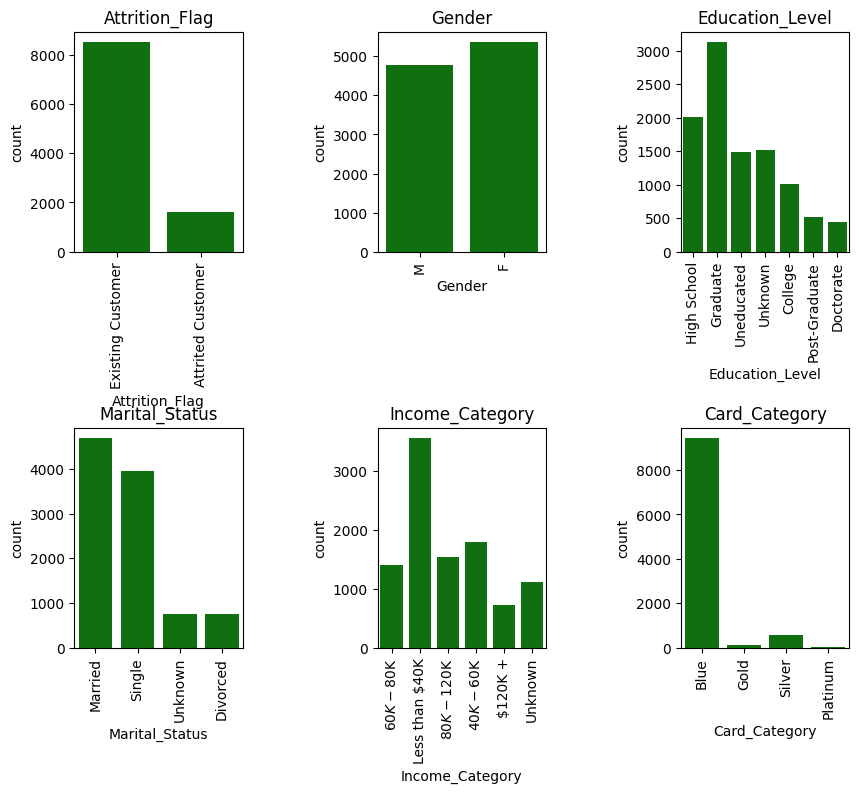

In [19]:
# Tạo ra một hình vẽ với 2 hàng và 3 cột (chiều rộng 10 inch, chiều cao 8 inch)
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

# Thiết lập khoảng cách giữa các hàng (hspace) và khoảng cách giữa các cột (wspace)
fig.subplots_adjust(hspace=0.8, wspace=0.8)

# Sử dụng vòng lặp để vẽ biểu đồ cho từng biến phân loại
for ax, var in zip(axes.flatten(), categorical_features): # lặp qua các trục và biến phân loại tương ứng
    # Đếm số lượng các giá trị trong biến phân loại var, sử dụng trục ax 
    sns.countplot(data=df, x=var, ax=ax, color='green')
    # Đặt tiêu đề cho biểu đồ trên trục ax với tên của biến phân loại var
    ax.set_title(var)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [20]:
# Đếm số lượng xuất hiện của mỗi giá trị trong cột "Attrition_Flag"
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [21]:
# Lọc các hàng trong dataframe "df" mà giá trị trong cột "Education_Level" là 'Unknown'
# value_counts() để đếm số lần xuất hiện của mỗi giá trị trong series
unknown_count1 = df.loc[df['Education_Level'] == 'Unknown', 'Attrition_Flag'].value_counts()
unknown_count1

Attrition_Flag
Existing Customer    1263
Attrited Customer     256
Name: count, dtype: int64

In [22]:
total_count = len(df['Education_Level'])
unknown_percentage1 = (unknown_count1 / total_count) * 100
unknown_percentage1

Attrition_Flag
Existing Customer    12.471611
Attrited Customer     2.527896
Name: count, dtype: float64

- Các câu lệnh có ý nghĩa tương tự

In [23]:
unknown_count2 = df.loc[df['Marital_Status'] == 'Unknown', 'Attrition_Flag'].value_counts()
unknown_count2

Attrition_Flag
Existing Customer    620
Attrited Customer    129
Name: count, dtype: int64

In [24]:
total_count2= len(df['Marital_Status'])
unknown_percentage2= (unknown_count2 / total_count2)* 100
unknown_percentage2

Attrition_Flag
Existing Customer    6.122247
Attrited Customer    1.273822
Name: count, dtype: float64

In [25]:
unknown_count3 = df.loc[df['Income_Category'] == 'Unknown', 'Attrition_Flag'].value_counts()
unknown_count3

Attrition_Flag
Existing Customer    925
Attrited Customer    187
Name: count, dtype: int64

In [26]:
total_count3= len(df['Income_Category'])
unknown_percentage3= (unknown_count3 / total_count3)* 100
unknown_percentage3

Attrition_Flag
Existing Customer    9.133998
Attrited Customer    1.846549
Name: count, dtype: float64

In [27]:
df['Card_Category'].value_counts()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

- Dữ liệu mất cân đối
- Unknown data ở các biến (Education_Level, Marital_Status, Income_Category)
- Blue Card gần như chiếm toàn bộ datasets

**Tính năng số (Numerical Features)**

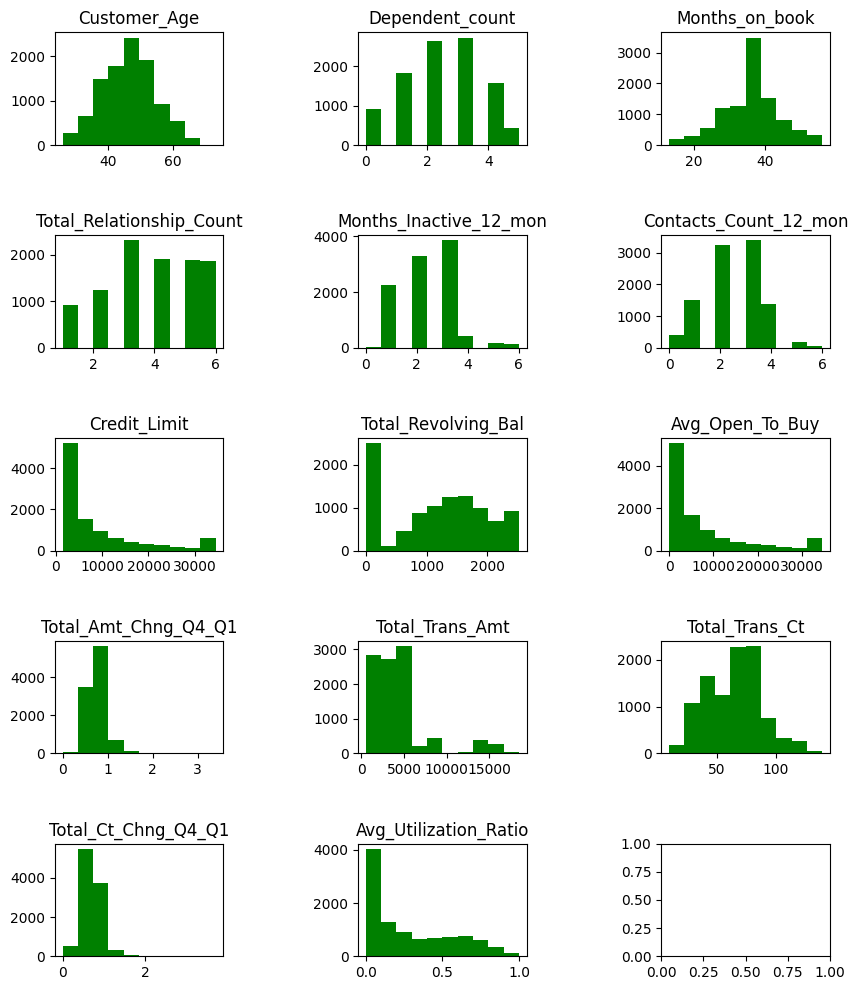

In [28]:
# Tạo ra một hình vẽ với 5 hàng và 3 cột
# lưu trữ các trục của các biểu đồ trong biến axes.
fig, axes = plt.subplots(5, 3, figsize=(10, 12))
# Thiết lập khoảng cách giữa các hàng và các cột
fig.subplots_adjust(hspace=0.8, wspace=0.8)

# Thiết lập vòng lặp để vẽ biểu đồ histogram cho từng biến số:

# lặp qua các biến số trong danh sách num_numerical 
# Sử dụng một biến chỉ mục i để truy cập các phần tử.
for i, var in enumerate(numerical_features):
    # chọn một trục (axes) cụ thể từ mảng axes dựa trên chỉ số hàng và chỉ số cột
    ax = axes[i // 3, i % 3]
    # i // 3: xác định chỉ số hàng trong mảng axes.
    # i % 3: xác định chỉ số cột trong mảng axes.
    ax.hist(df[var], color='green')
    # vẽ biểu đồ histogram cho biến số var từ DataFrame df sử dụng trục ax
    ax.set_title(var)

plt.show()

In [29]:
# Lọc các hàng có giá trị bằng 0 trong biến 'Avg_Utilization_Ratio'
# lấy cột 'Months_on_book' cho các hàng đã lọc
df.loc[df['Avg_Utilization_Ratio'] == 0, 'Months_on_book'].sort_values()

1916    13
1488    13
2284    13
2162    13
2180    13
        ..
3931    56
3784    56
1830    56
4066    56
4331    56
Name: Months_on_book, Length: 2470, dtype: int64

In [30]:
len(numerical_features)

14

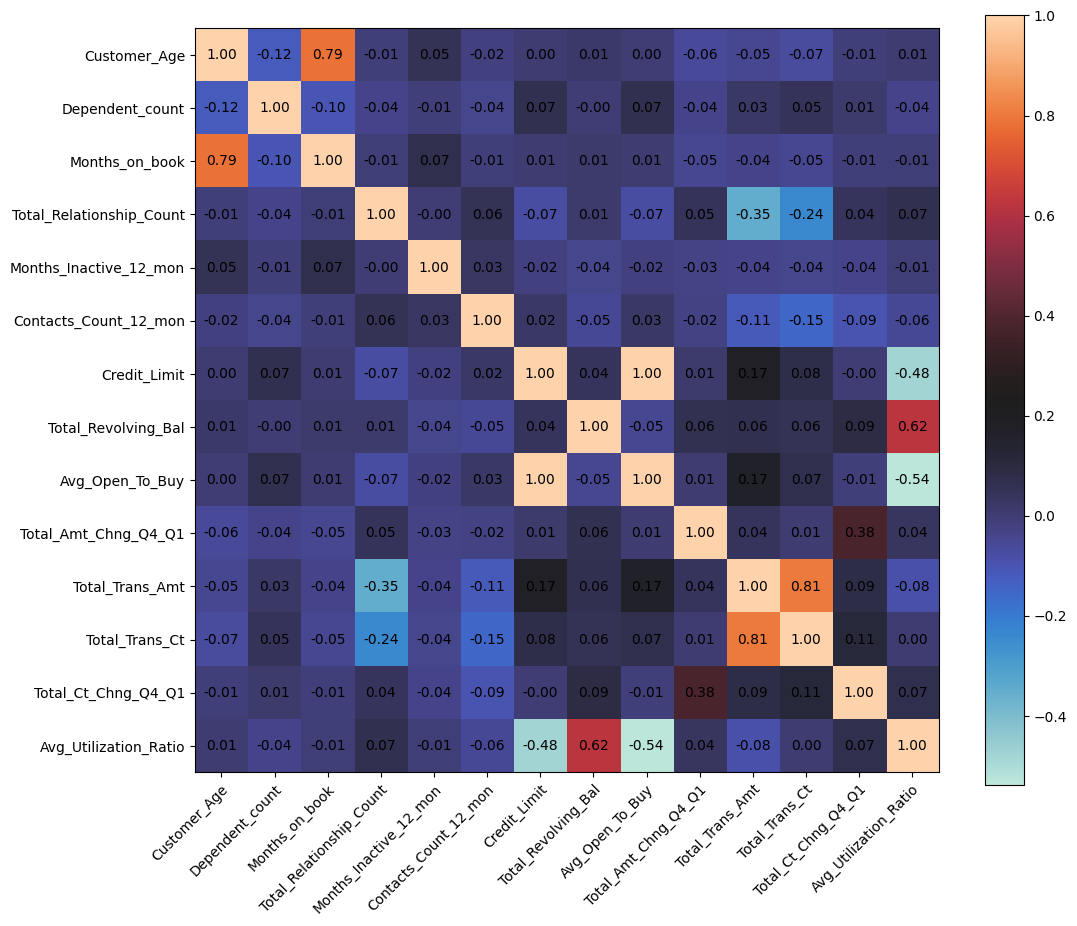

In [31]:
#đánh giá tương quan giữa các biến số

# df[numerical_features] chọn các cột chỉ bao gồm các biến số trong danh sách numerical_features.
# corr() tính ma trận tương quan giữa các biến số đã chọn và lưu kết quả vào corr_matrix.
corr_matrix = df[numerical_features].corr()

# Tạo đối tượng hình vẽ với kích thước (12, 10) và lưu trữ trục (axes) vào ax.
fig, ax = plt.subplots(figsize=(12, 10))
# Vẽ ma trận tương quan corr_matrix trên trục ax sử dụng màu sắc từ bản đồ màu 'icefire'.
im = ax.imshow(corr_matrix, cmap='icefire')

# Đặt các điểm đánh dấu trục x từ 0 đến số lượng biến số trong numerical_features.
ax.set_xticks(np.arange(len(numerical_features)))
# Đặt các điểm đánh dấu trục y từ 0 đến số lượng biến số trong numerical_features.
ax.set_yticks(np.arange(len(numerical_features)))
# Đặt labels cho 2 trục x, y
ax.set_xticklabels(numerical_features)
ax.set_yticklabels(numerical_features)

# Điều chỉnh góc và định dạng nhãn trục x
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Thiết lập góc xoay 45 độ và căn phải cho nhãn trục x.

#Thêm giá trị tương quan vào ma trận tương quan:
for i in range(len(numerical_features)): #Sử dụng vòng lặp for để lặp qua các cặp giá trị trong coor_matrix
    for j in range(len(numerical_features)):
        text = ax.text(j, i, format(corr_matrix.iloc[i, j], ".2f"), # lấy 2 chữ số sau dấu phẩy
                       ha="center", va="center", color="black")
        # j,i: xác định vị trí của giá trị tương quan trên trục x, y tương ứng
        # corr_matrix.iloc[i, j]: Đây là giá trị tương quan tại vị trí (i, j) trong ma trận
        # format(): định dạng giá trị tương quan.

plt.colorbar(im)
plt.show()

In [32]:
df[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Dependent_count           10127 non-null  int64  
 2   Months_on_book            10127 non-null  int64  
 3   Total_Relationship_Count  10127 non-null  int64  
 4   Months_Inactive_12_mon    10127 non-null  int64  
 5   Contacts_Count_12_mon     10127 non-null  int64  
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  int64  
 8   Avg_Open_To_Buy           10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 10  Total_Trans_Amt           10127 non-null  int64  
 11  Total_Trans_Ct            10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 13  Avg_Utilization_Ratio     10127 non-null  float64
dtypes: flo

### 2.2. Kỹ thuật tạo đặc trưng (feature engineering) và lựa chọn đặc trưng (feature selection)

#### 2.2.1. Nhóm các giá trị vào các bin khác nhau và vẽ biểu đồ 

**Nhóm theo độ tuổi - Customer Age**
- Chia thành các nhóm tuổi: dưới 30, từ 30-40, 40-50, 50-60 và trên 60

C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\1145917494.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp2.groupby(['Customer_Age_Binning', 'Attrition_Flag'])['Frequency_of_Loans'].sum().unstack().plot(kind='bar',


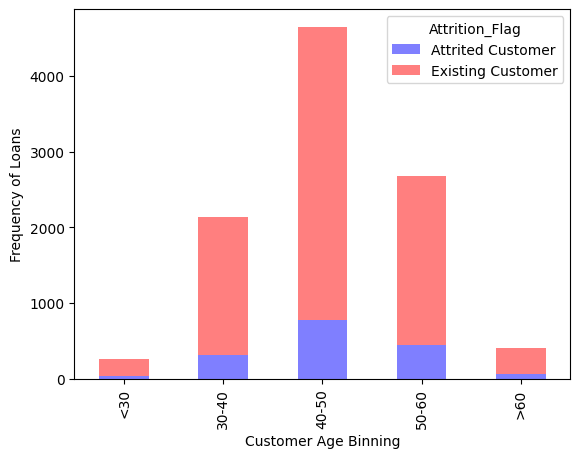

In [33]:
converter = lambda x: '<30' if (x <= 30) else \
                        ('30-40' if (x > 30 and x <= 40) else \
                        ('40-50' if (x > 40 and x <= 50) else \
                        ('50-60' if (x > 50 and x <= 60) else \
                        '>60')))


tmp = df['Customer_Age'].apply(converter)
df['Customer_Age_Binning'] = tmp

tmp2 = df.groupby('Customer_Age_Binning')['Attrition_Flag'].value_counts()
tmp2 = pd.DataFrame(tmp2)
tmp2 = tmp2.rename(columns={'count':'Frequency_of_Loans'})
tmp2= tmp2.reset_index()
tmp2['Customer_Age_Binning'] = pd.Categorical(tmp2['Customer_Age_Binning'], 
                                              categories=['<30','30-40','40-50','50-60','>60'], 
                                              ordered=True)
import matplotlib.pyplot as plt
color_map = {'Existing Customer': 'blue', 'Attrited Customer': 'red'}
fig, ax = plt.subplots()
tmp2.groupby(['Customer_Age_Binning', 'Attrition_Flag'])['Frequency_of_Loans'].sum().unstack().plot(kind='bar', 
            stacked=True, ax=ax, color=tmp2['Attrition_Flag'].map(color_map), alpha=0.5)

plt.xlabel('Customer Age Binning')
plt.ylabel('Frequency of Loans')
plt.show()


**Đa số khách hàng là ở các độ tuổi là khách hàng đang dùng sản phẩm và ở độ tuổi từ 40-50**

**Nhóm theo Months on book (thời gian là khách hàng theo giá trị ghi sổ)**

C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\2611104102.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp2 = df.groupby(var_binning)['Attrition_Flag'].value_counts()
C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\2611104102.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp2.groupby(['Months_on_book_Binning', 'Attrition_Flag'])['Frequency_of_Loans'].sum().unstack().plot(kind='bar',


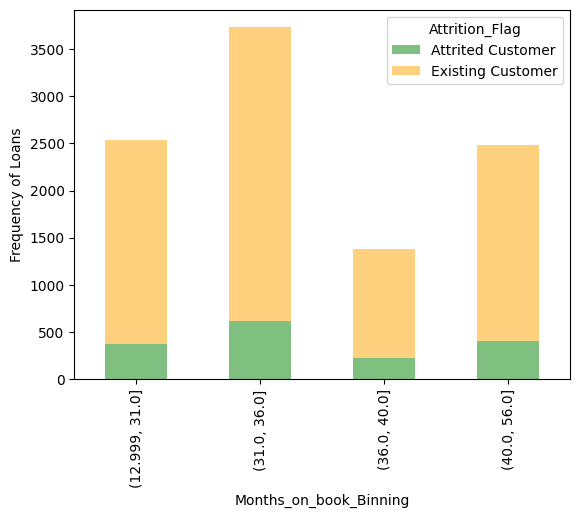

In [34]:
var = 'Months_on_book'
var_binning = var + '_Binning'
tmp = pd.qcut(df[var], q=4) #Chia thành 4 nhóm với thành 4 khoảng dựa trên quantities, số lượng quan sát gần bằng nhau
df[var_binning] = tmp

tmp2 = df.groupby(var_binning)['Attrition_Flag'].value_counts()
tmp2 = pd.DataFrame(tmp2)
tmp2 = tmp2.rename(columns={'count':'Frequency_of_Loans'})
tmp2 = tmp2.reset_index()
color_map = {'Existing Customer': 'green', 'Attrited Customer': 'orange'}
fig, ax = plt.subplots()
tmp2.groupby(['Months_on_book_Binning', 'Attrition_Flag'])['Frequency_of_Loans'].sum().unstack().plot(kind='bar', 
            stacked=True, ax=ax, color=tmp2['Attrition_Flag'].map(color_map), alpha=0.5)

plt.xlabel('Months_on_book_Binning')
plt.ylabel('Frequency of Loans')
plt.show()


**Nhóm theo Credit Limit (Hạn mức tín dụng)**

C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\1987004052.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp2 = df.groupby(var_binning)['Attrition_Flag'].value_counts()
C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\1987004052.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp2.groupby(['Credit_Limit_Binning', 'Attrition_Flag'])['Frequency_of_Loans'].sum().unstack().plot(kind='bar',


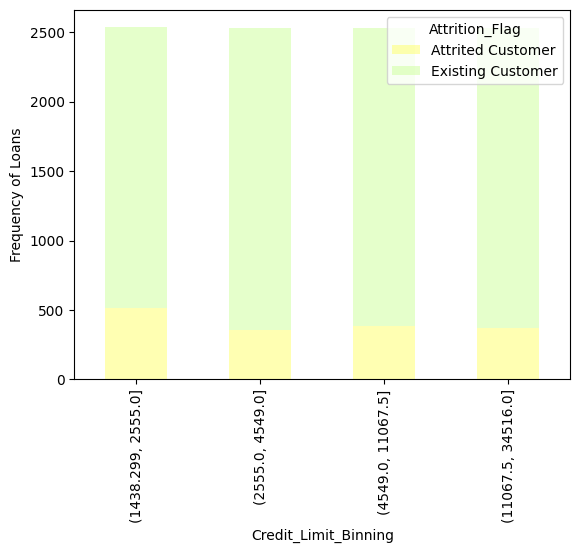

In [35]:
var = 'Credit_Limit'
var_binning = var + '_Binning'
tmp = pd.qcut(df[var], q=4) #Chia thành 4 nhóm với thành 4 khoảng dựa trên quantities, số lượng quan sát gần bằng nhau
df[var_binning] = tmp

tmp2 = df.groupby(var_binning)['Attrition_Flag'].value_counts()
tmp2 = pd.DataFrame(tmp2)
tmp2 = tmp2.rename(columns={'count':'Frequency_of_Loans'})
tmp2 = tmp2.reset_index()
color_map = {'Existing Customer': '#FFFF66', 'Attrited Customer': '#CCFF99'}
fig, ax = plt.subplots()
tmp2.groupby(['Credit_Limit_Binning', 'Attrition_Flag'])['Frequency_of_Loans'].sum().unstack().plot(kind='bar', 
            stacked=True, ax=ax, color=tmp2['Attrition_Flag'].map(color_map), alpha=0.5)

plt.xlabel('Credit_Limit_Binning')
plt.ylabel('Frequency of Loans')
plt.show()

**Nhóm theo Total_Revolving_Bal (Tổng số dư quay vòng)**

C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\3410885648.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp2 = df.groupby(var_binning)['Attrition_Flag'].value_counts()
C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\3410885648.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp2.groupby(['Total_Revolving_Bal_Binning', 'Attrition_Flag'])['Frequency_of_Loans'].sum().unstack().plot(kind='bar',


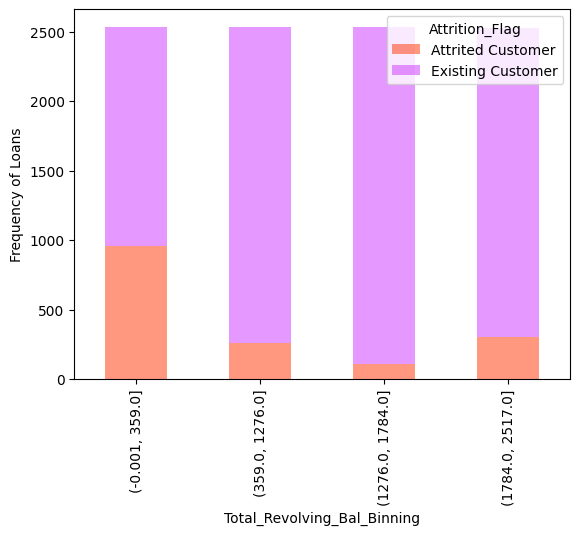

In [36]:
var = 'Total_Revolving_Bal'
var_binning = var + '_Binning'
tmp = pd.qcut(df[var], q=4) #Chia thành 4 nhóm với thành 4 khoảng dựa trên quantities, số lượng quan sát gần bằng nhau
df[var_binning] = tmp

tmp2 = df.groupby(var_binning)['Attrition_Flag'].value_counts()
tmp2 = pd.DataFrame(tmp2)
tmp2 = tmp2.rename(columns={'count':'Frequency_of_Loans'})
tmp2 = tmp2.reset_index()
color_map = {'Existing Customer': '#FF3300', 'Attrited Customer': '#CC33FF'}
fig, ax = plt.subplots()
tmp2.groupby(['Total_Revolving_Bal_Binning', 'Attrition_Flag'])['Frequency_of_Loans'].sum().unstack().plot(kind='bar', 
            stacked=True, ax=ax, color=tmp2['Attrition_Flag'].map(color_map), alpha=0.5)

plt.xlabel('Total_Revolving_Bal_Binning')
plt.ylabel('Frequency of Loans')
plt.show()

**Nhóm theo Avg_Open_To_Buy**

C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\2099418112.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp2 = df.groupby(var_binning)['Attrition_Flag'].value_counts()
C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\2099418112.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp2.groupby(['Avg_Open_To_Buy_Binning', 'Attrition_Flag'])['Frequency_of_Loans'].sum().unstack().plot(kind='bar',


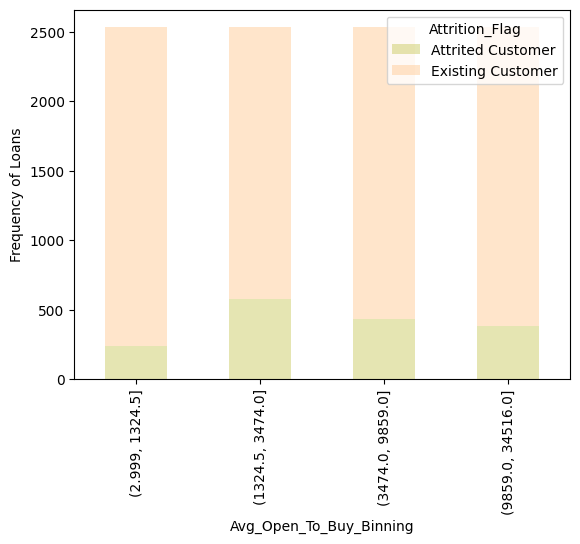

In [37]:
var = 'Avg_Open_To_Buy'
var_binning = var + '_Binning'
tmp = pd.qcut(df[var], q=4) #Chia thành 4 nhóm với thành 4 khoảng dựa trên quantities, số lượng quan sát gần bằng nhau
df[var_binning] = tmp

tmp2 = df.groupby(var_binning)['Attrition_Flag'].value_counts()
tmp2 = pd.DataFrame(tmp2)
tmp2 = tmp2.rename(columns={'count':'Frequency_of_Loans'})
tmp2 = tmp2.reset_index()
color_map = {'Existing Customer': '#CCCC66', 'Attrited Customer': '#FFCC99'}
fig, ax = plt.subplots()
tmp2.groupby(['Avg_Open_To_Buy_Binning', 'Attrition_Flag'])['Frequency_of_Loans'].sum().unstack().plot(kind='bar', 
            stacked=True, ax=ax, color=tmp2['Attrition_Flag'].map(color_map), alpha=0.5)

plt.xlabel('Avg_Open_To_Buy_Binning')
plt.ylabel('Frequency of Loans')
plt.show()

**Nhóm theo Total_Amt_Chng_Q4_Q1 (Tổng thay đổi về số tiền giao dịch trong 4 quý vừa qua)**

C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\4048355425.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp2 = df.groupby(var_binning)['Attrition_Flag'].value_counts()
C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\4048355425.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp2.groupby(['Total_Amt_Chng_Q4_Q1_Binning', 'Attrition_Flag'])['Frequency_of_Loans'].sum().unstack().plot(kind='bar',


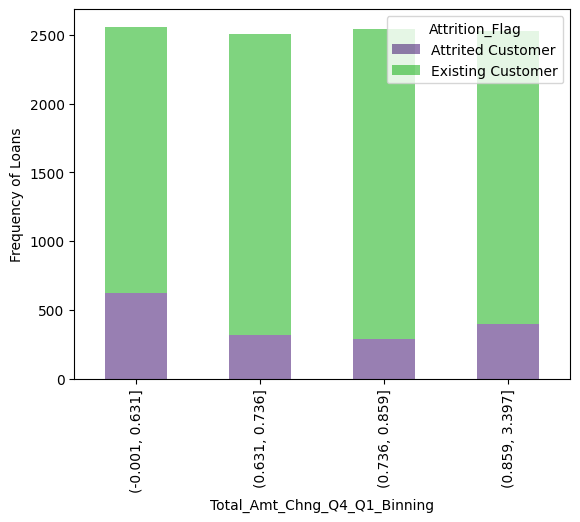

In [38]:
var = 'Total_Amt_Chng_Q4_Q1'
var_binning = var + '_Binning'
tmp = pd.qcut(df[var], q=4) #Chia thành 4 nhóm với thành 4 khoảng dựa trên quantities, số lượng quan sát gần bằng nhau
df[var_binning] = tmp

tmp2 = df.groupby(var_binning)['Attrition_Flag'].value_counts()
tmp2 = pd.DataFrame(tmp2)
tmp2 = tmp2.rename(columns={'count':'Frequency_of_Loans'})
tmp2 = tmp2.reset_index()
color_map = {'Existing Customer': '#330066', 'Attrited Customer': '#00AA00'}
fig, ax = plt.subplots()
tmp2.groupby(['Total_Amt_Chng_Q4_Q1_Binning', 'Attrition_Flag'])['Frequency_of_Loans'].sum().unstack().plot(kind='bar', 
            stacked=True, ax=ax, color=tmp2['Attrition_Flag'].map(color_map), alpha=0.5)

plt.xlabel('Total_Amt_Chng_Q4_Q1_Binning')
plt.ylabel('Frequency of Loans')
plt.show()

**Nhóm theo Total_Trans_Amt (Tổng số tiền giao dịch trong 12 tháng vừa qua)**

C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\1553374416.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp2 = df.groupby(var_binning)['Attrition_Flag'].value_counts()
C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\1553374416.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp2.groupby(['Total_Trans_Amt_Binning', 'Attrition_Flag'])['Frequency_of_Loans'].sum().unstack().plot(kind='bar',


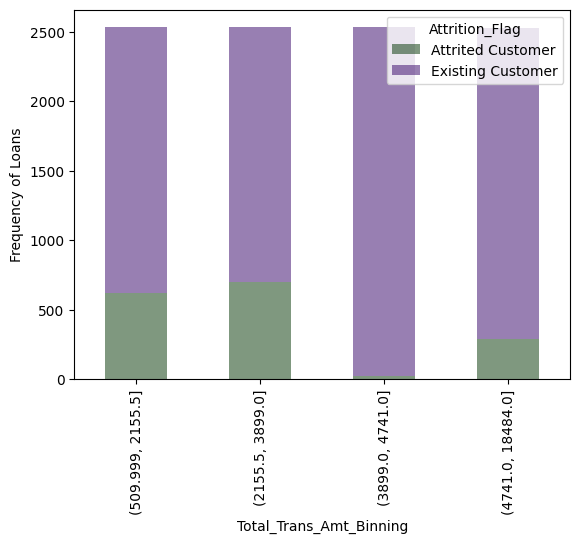

In [39]:
var = 'Total_Trans_Amt'
var_binning = var + '_Binning'
tmp = pd.qcut(df[var], q=4) #Chia thành 4 nhóm với thành 4 khoảng dựa trên quantities, số lượng quan sát gần bằng nhau
df[var_binning] = tmp

tmp2 = df.groupby(var_binning)['Attrition_Flag'].value_counts()
tmp2 = pd.DataFrame(tmp2)
tmp2 = tmp2.rename(columns={'count':'Frequency_of_Loans'})
tmp2 = tmp2.reset_index()
color_map = {'Existing Customer': '#003300', 'Attrited Customer': '#330066'}
fig, ax = plt.subplots()
tmp2.groupby(['Total_Trans_Amt_Binning', 'Attrition_Flag'])['Frequency_of_Loans'].sum().unstack().plot(kind='bar', 
            stacked=True, ax=ax, color=tmp2['Attrition_Flag'].map(color_map), alpha=0.5)

plt.xlabel('Total_Trans_Amt_Binning')
plt.ylabel('Frequency of Loans')
plt.show()

**Nhóm theo Total_Trans_Ct (Tổng số giao dịch trong 12 tháng vừa qua)**

C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\715035933.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp2 = df.groupby(var_binning)['Attrition_Flag'].value_counts()
C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\715035933.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp2.groupby(['Total_Trans_Ct_Binning', 'Attrition_Flag'])['Frequency_of_Loans'].sum().unstack().plot(kind='bar',


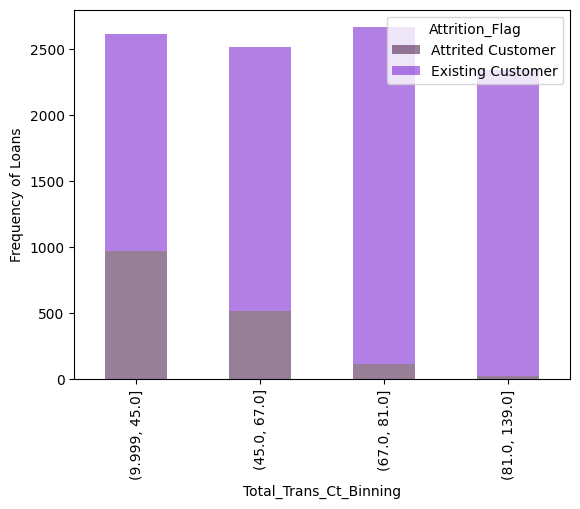

In [40]:
var = 'Total_Trans_Ct'
var_binning = var + '_Binning'
tmp = pd.qcut(df[var], q=4) #Chia thành 4 nhóm với thành 4 khoảng dựa trên quantities, số lượng quan sát gần bằng nhau
df[var_binning] = tmp

tmp2 = df.groupby(var_binning)['Attrition_Flag'].value_counts()
tmp2 = pd.DataFrame(tmp2)
tmp2 = tmp2.rename(columns={'count':'Frequency_of_Loans'})
tmp2 = tmp2.reset_index()
color_map = {'Existing Customer': '#330033', 'Attrited Customer': '#6600CC'}
fig, ax = plt.subplots()
tmp2.groupby(['Total_Trans_Ct_Binning', 'Attrition_Flag'])['Frequency_of_Loans'].sum().unstack().plot(kind='bar', 
            stacked=True, ax=ax, color=tmp2['Attrition_Flag'].map(color_map), alpha=0.5)

plt.xlabel('Total_Trans_Ct_Binning')
plt.ylabel('Frequency of Loans')
plt.show()

**Nhóm theo Total_Ct_Chng_Q4_Q1 (Thay đổi về số lượng giao dịch trong 4 quý vừa qua)**

C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\267783300.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp2 = df.groupby(var_binning)['Attrition_Flag'].value_counts()
C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\267783300.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp2.groupby(['Total_Ct_Chng_Q4_Q1_Binning', 'Attrition_Flag'])['Frequency_of_Loans'].sum().unstack().plot(kind='bar',


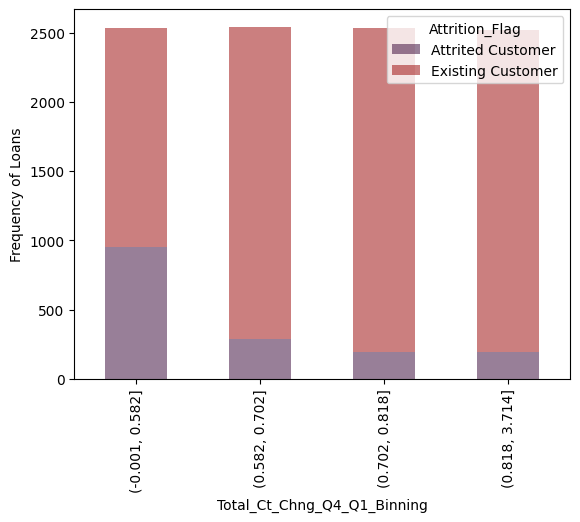

In [41]:
var = 'Total_Ct_Chng_Q4_Q1'
var_binning = var + '_Binning'
tmp = pd.qcut(df[var], q=4) #Chia thành 4 nhóm với thành 4 khoảng dựa trên quantities, số lượng quan sát gần bằng nhau
df[var_binning] = tmp

tmp2 = df.groupby(var_binning)['Attrition_Flag'].value_counts()
tmp2 = pd.DataFrame(tmp2)
tmp2 = tmp2.rename(columns={'count':'Frequency_of_Loans'})
tmp2 = tmp2.reset_index()
color_map = {'Existing Customer': '#330033', 'Attrited Customer': '#990000'}
fig, ax = plt.subplots()
tmp2.groupby(['Total_Ct_Chng_Q4_Q1_Binning', 'Attrition_Flag'])['Frequency_of_Loans'].sum().unstack().plot(kind='bar', 
            stacked=True, ax=ax, color=tmp2['Attrition_Flag'].map(color_map), alpha=0.5)

plt.xlabel('Total_Ct_Chng_Q4_Q1_Binning')
plt.ylabel('Frequency of Loans')
plt.show()

**Nhóm theo Avg_Utilization_Ratio (Tỉ lệ sử dụng trung bình của thẻ tín dụng)**

C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\1157429586.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp2.groupby(['Avg_Utilization_Ratio_Binning', 'Attrition_Flag'])['Frequency_of_Loans'].sum().unstack().plot(kind='bar',


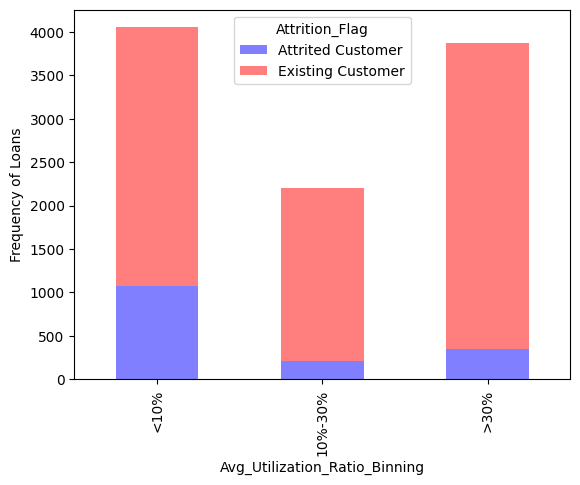

In [42]:
converter = lambda x: '<10%' if (x <= 0.1) else \
                        ('10%-30%' if (x > 0.1 and x <= 0.3) else \
                        ('>30%' ))


tmp = df['Avg_Utilization_Ratio'].apply(converter)
df['Avg_Utilization_Ratio_Binning'] = tmp

tmp2 = df.groupby('Avg_Utilization_Ratio_Binning')['Attrition_Flag'].value_counts()
tmp2 = pd.DataFrame(tmp2)
tmp2 = tmp2.rename(columns={'count':'Frequency_of_Loans'})
tmp2= tmp2.reset_index()
tmp2['Avg_Utilization_Ratio_Binning'] = pd.Categorical(tmp2['Avg_Utilization_Ratio_Binning'], 
                                              categories=['<10%','10%-30%','>30%'], 
                                              ordered=True)
import matplotlib.pyplot as plt
color_map = {'Existing Customer': 'blue', 'Attrited Customer': 'red'}
fig, ax = plt.subplots()
tmp2.groupby(['Avg_Utilization_Ratio_Binning', 'Attrition_Flag'])['Frequency_of_Loans'].sum().unstack().plot(kind='bar', 
            stacked=True, ax=ax, color=tmp2['Attrition_Flag'].map(color_map), alpha=0.5)

plt.xlabel('Avg_Utilization_Ratio_Binning')
plt.ylabel('Frequency of Loans')
plt.show()

#### 2.2.2. WOE (Weight of evidence) : Trọng số bằng chứng
##### Định nghĩa
- WOE (weight of evidence) là một trong những kĩ thuật tạo đặc trưng (feature engineering) và lựa chọn đặc trưng (feature selection) khá hiệu quả.
- Phương pháp này sẽ xếp hạng các biến thành mạnh, trung bình, yếu, không tác động,… dựa trên điểm số đánh giá về sức mạnh dự báo nợ xấu. 

##### Phương pháp WOE có 2 kỹ thuật xử lý
###### Đối với biến liên tục
- Các bins sẽ là các khoảng liên tiếp được xác định từ biến liên tục sao cho số lượng quan sát ở mỗi bin là bằng nhau.
- Để xác định các bins thì ta cần xác định số lượng bins. 
- Các bins được ngăn cách bởi lượng tử hay quantile.

###### Đối với biến phân loại
- WOE có thể chia mỗi một nhóm là một bin hoặc có thể nhóm vài nhóm có số lượng quan sát ít vào một bin. 
- Mức độ chênh lệch giữa phân phối GOOD/BAD được đo lường thông qua chỉ số WOE cũng có thể được sử dụng để nhận diện các nhóm có cùng tính chất phân loại. Nếu giá trị WOE của chúng càng gần nhau thì có thể chúng sẽ được nhóm vào một nhóm.
- Trường hợp Null cũng có thể được coi là một nhóm riêng biệt nếu số lượng của nó là đáng kể hoặc nhóm vào các nhóm khác nếu nó là thiểu số.

##### Công thức WOE
- Trọng số bằng chứng được sử dụng để đo lường sự khác biệt giữa tỷ lệ %Good và %Bad trên từng bin. 
- Trọng số bằng chứng được tính toán bằng logarit của %Good/%Bad.
- Tính chất của WOE: Giá trị WOE tại một bin càng lớn là dấu hiệu chứng tỏ đặc trưng rất tốt trong việc nhận diện hồ sơ Good và trái lại nếu giá trị WOE càng nhỏ thì đặc trưng bin sẽ rất tốt trong việc nhận diện hồ sơ Bad.
- WOE > 1 thì phân phối của hồ sơ Good đang chiếm ưu thế hơn Bad và trái lại.

#### IV (Information Value): trọng số thông tin
- Tiêu chuẩn xếp hạng các biến sẽ là chỉ số giá trị thông tin IV (information value) được tính toán từ phương pháp WOE. Đồng thời mô hình cũng tạo ra các đặc trưng cho mỗi biến. Giá trị này sẽ đo lường sự khác biệt trong phân phối giữa GOOD và BAD.
- Giá trị IV sẽ cho ta biết mức độ chênh lệch của %Good và %Bad ở mỗi bin là nhiều hay ít. 
- Nếu IV cao thì sự khác biệt trong phân phối giữa %Good và %Bad sẽ lớn và biến hữu ích hơn trong việc phân loại hồ sơ và trái lại IV nhỏ thì biến ít hữu ích trong việc phân loại hồ sơ.

##### Tiêu chuẩn phân loại sức mạnh của biến theo IV
- Nhỏ hơn hoặc bằng 0.02: Biến không có tác dụng trong việc phân loại hồ sơ Good/Bad.
- 0.02 - 0.1: yếu
- 0.1 - 0.3: trung bình
- 0.3 - 0.5: mạnh
- Lớn hơn hoặc bằng 0.5: Biến rất mạnh, tuy nhiên trường hợp này cần được kiểm tra lại để tránh trường hợp biến có mối quan hệ trực tiếp để định nghĩa hồ sơ Good/Bad.

**Kiểm tra lại dataset**

In [43]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Customer_Age_Binning,Months_on_book_Binning,Credit_Limit_Binning,Total_Revolving_Bal_Binning,Avg_Open_To_Buy_Binning,Total_Amt_Chng_Q4_Q1_Binning,Total_Trans_Amt_Binning,Total_Trans_Ct_Binning,Total_Ct_Chng_Q4_Q1_Binning,Avg_Utilization_Ratio_Binning
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,40-50,"(36.0, 40.0]","(11067.5, 34516.0]","(359.0, 1276.0]","(9859.0, 34516.0]","(0.859, 3.397]","(509.999, 2155.5]","(9.999, 45.0]","(0.818, 3.714]",<10%
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,40-50,"(40.0, 56.0]","(4549.0, 11067.5]","(359.0, 1276.0]","(3474.0, 9859.0]","(0.859, 3.397]","(509.999, 2155.5]","(9.999, 45.0]","(0.818, 3.714]",10%-30%
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,50-60,"(31.0, 36.0]","(2555.0, 4549.0]","(-0.001, 359.0]","(1324.5, 3474.0]","(0.859, 3.397]","(509.999, 2155.5]","(9.999, 45.0]","(0.818, 3.714]",<10%
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,30-40,"(31.0, 36.0]","(2555.0, 4549.0]","(1784.0, 2517.0]","(2.999, 1324.5]","(0.859, 3.397]","(509.999, 2155.5]","(9.999, 45.0]","(0.818, 3.714]",>30%
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,30-40,"(12.999, 31.0]","(4549.0, 11067.5]","(-0.001, 359.0]","(3474.0, 9859.0]","(0.859, 3.397]","(509.999, 2155.5]","(9.999, 45.0]","(0.818, 3.714]",<10%


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Attrition_Flag                 10127 non-null  object  
 1   Customer_Age                   10127 non-null  int64   
 2   Gender                         10127 non-null  object  
 3   Dependent_count                10127 non-null  int64   
 4   Education_Level                10127 non-null  object  
 5   Marital_Status                 10127 non-null  object  
 6   Income_Category                10127 non-null  object  
 7   Card_Category                  10127 non-null  object  
 8   Months_on_book                 10127 non-null  int64   
 9   Total_Relationship_Count       10127 non-null  int64   
 10  Months_Inactive_12_mon         10127 non-null  int64   
 11  Contacts_Count_12_mon          10127 non-null  int64   
 12  Credit_Limit                   1

**Tính số lượng tình trạng khách hàng**

In [45]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

**Tính số lượng loại thẻ**

In [46]:
df['Card_Category'].value_counts()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

**Tính số lượng tình trạng khách hàng đối với các tệp khách hàng có tỉ lệ tiêu dùng trung bình gần như bằng 0**

In [47]:
df[df['Avg_Utilization_Ratio'] == 0]['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    1577
Attrited Customer     893
Name: count, dtype: int64

In [48]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Customer_Age_Binning,Months_on_book_Binning,Credit_Limit_Binning,Total_Revolving_Bal_Binning,Avg_Open_To_Buy_Binning,Total_Amt_Chng_Q4_Q1_Binning,Total_Trans_Amt_Binning,Total_Trans_Ct_Binning,Total_Ct_Chng_Q4_Q1_Binning,Avg_Utilization_Ratio_Binning
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,40-50,"(36.0, 40.0]","(11067.5, 34516.0]","(359.0, 1276.0]","(9859.0, 34516.0]","(0.859, 3.397]","(509.999, 2155.5]","(9.999, 45.0]","(0.818, 3.714]",<10%
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,40-50,"(40.0, 56.0]","(4549.0, 11067.5]","(359.0, 1276.0]","(3474.0, 9859.0]","(0.859, 3.397]","(509.999, 2155.5]","(9.999, 45.0]","(0.818, 3.714]",10%-30%
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,50-60,"(31.0, 36.0]","(2555.0, 4549.0]","(-0.001, 359.0]","(1324.5, 3474.0]","(0.859, 3.397]","(509.999, 2155.5]","(9.999, 45.0]","(0.818, 3.714]",<10%
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,30-40,"(31.0, 36.0]","(2555.0, 4549.0]","(1784.0, 2517.0]","(2.999, 1324.5]","(0.859, 3.397]","(509.999, 2155.5]","(9.999, 45.0]","(0.818, 3.714]",>30%
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,30-40,"(12.999, 31.0]","(4549.0, 11067.5]","(-0.001, 359.0]","(3474.0, 9859.0]","(0.859, 3.397]","(509.999, 2155.5]","(9.999, 45.0]","(0.818, 3.714]",<10%


In [49]:
selected_feature = ['Attrition_Flag', 
                   'Gender', 'Customer_Age_Binning', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 
                   'Months_on_book_Binning', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 
                   'Credit_Limit_Binning', 'Total_Revolving_Bal_Binning', 'Avg_Open_To_Buy_Binning', 'Total_Amt_Chng_Q4_Q1_Binning', 
                   'Total_Trans_Amt_Binning', 'Total_Trans_Ct_Binning', 'Total_Ct_Chng_Q4_Q1_Binning', 'Avg_Utilization_Ratio_Binning']

df = df[selected_feature]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Attrition_Flag                 10127 non-null  object  
 1   Gender                         10127 non-null  object  
 2   Customer_Age_Binning           10127 non-null  object  
 3   Dependent_count                10127 non-null  int64   
 4   Education_Level                10127 non-null  object  
 5   Marital_Status                 10127 non-null  object  
 6   Income_Category                10127 non-null  object  
 7   Months_on_book_Binning         10127 non-null  category
 8   Total_Relationship_Count       10127 non-null  int64   
 9   Months_Inactive_12_mon         10127 non-null  int64   
 10  Contacts_Count_12_mon          10127 non-null  int64   
 11  Credit_Limit_Binning           10127 non-null  category
 12  Total_Revolving_Bal_Binning    1

**Tính chỉ số WOE và IV**

In [50]:
iv_list = []

for var in selected_feature[1:]:
    new_var = var + '_woe'
    #Tạo bảng chỉ số WOE
    tmp = df.groupby(var)['Attrition_Flag'].value_counts()
    tmp = pd.DataFrame(tmp)
    tmp = tmp.rename(columns={'count':'Frequency_of_Loans'})
    tmp = tmp.reset_index()
    woe_table = tmp.pivot(index=var, columns='Attrition_Flag', values='Frequency_of_Loans')

    
    # Tính chỉ số WOE và IV
    num_attrited = woe_table['Attrited Customer'].sum()
    num_existing = woe_table['Existing Customer'].sum()

    woe_table['DB'] = woe_table['Attrited Customer']/num_attrited
    woe_table['DG'] = woe_table['Existing Customer']/num_existing
    woe_table['perc_diff'] = woe_table['DG']-woe_table['DB']
    woe_table['woe'] = np.log(woe_table['DG']/woe_table['DB'])

    # Lưu lại chỉ số IV vào iv_list
    iv_data = {'var':var, 
               'iv':(woe_table['perc_diff']*woe_table['woe']).sum()}
    iv_list.append(iv_data)

    # đưa các giá trị WOE tính được vào các cột biến woe mới
    df[new_var] = pd.merge(df, woe_table, how='left', left_on=var, 
                                right_index=True)['woe']
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\3485722754.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = df.groupby(var)['Attrition_Flag'].value_counts()
C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\3485722754.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = df.groupby(var)['Attrition_Flag'].value_counts()
C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\3485722754.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and

,Attrition_Flag,Gender,Customer_Age_Binning,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book_Binning,Total_Relationship_Count,Months_Inactive_12_mon,...,Months_Inactive_12_mon_woe,Contacts_Count_12_mon_woe,Credit_Limit_Binning_woe,Total_Revolving_Bal_Binning_woe,Avg_Open_To_Buy_Binning_woe,Total_Amt_Chng_Q4_Q1_Binning_woe,Total_Trans_Amt_Binning_woe,Total_Trans_Ct_Binning_woe,Total_Ct_Chng_Q4_Q1_Binning_woe,Avg_Utilization_Ratio_Binning_woe
0,Existing Customer,M,40-50,3,High School,Married,$60K - $80K,"(36.0, 40.0]",5,1,...,1.406786,-0.276254,0.115126,0.510127,0.065255,0.019708,-0.522866,-1.124281,0.840652,-0.626787
1,Existing Customer,F,40-50,5,Graduate,Single,Less than $40K,"(40.0, 56.0]",6,1,...,1.406786,0.293645,0.057742,0.510127,-0.066945,0.019708,-0.522866,-1.124281,0.840652,0.600730
2,Existing Customer,M,50-60,3,Graduate,Married,$80K - $120K,"(31.0, 36.0]",4,1,...,1.406786,2.372023,0.163078,-1.151760,-0.430779,0.019708,-0.522866,-1.124281,0.840652,-0.626787
3,Existing Customer,F,30-40,4,High School,Unknown,Less than $40K,"(31.0, 36.0]",3,4,...,-0.800551,0.902319,0.163078,0.347972,0.621764,0.019708,-0.522866,-1.124281,0.840652,0.659235
4,Existing Customer,M,30-40,3,Uneducated,Married,$60K - $80K,"(12.999, 31.0]",5,1,...,1.406786,2.372023,0.057742,-1.151760,-0.066945,0.019708,-0.522866,-1.124281,0.840652,-0.626787


**Sau khi tính được chỉ số WOE, biểu diễn trực quan hóa chỉ số IV để xem xét mức độ ảnh hưởng của các biến**

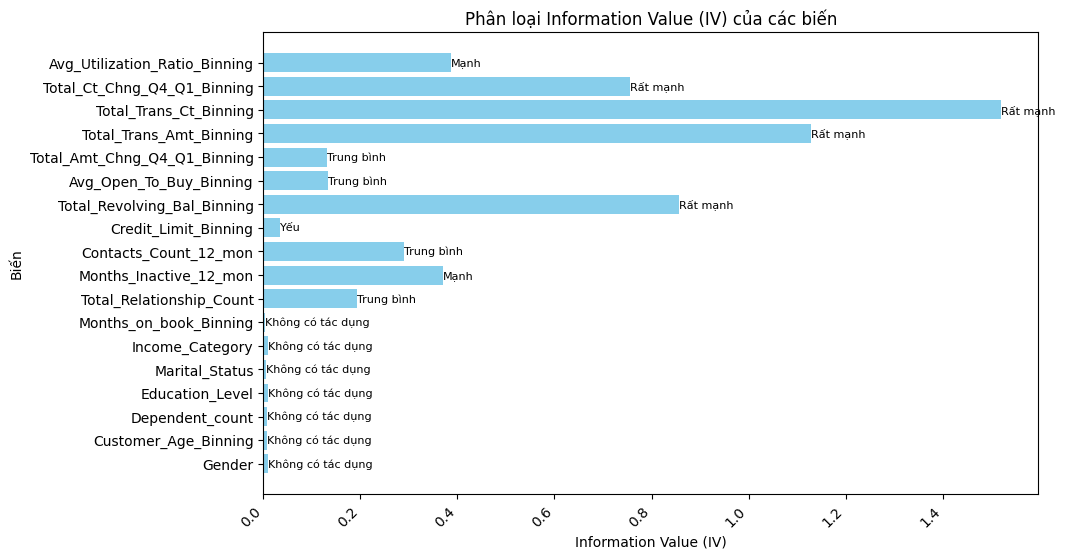

In [51]:
# Tạo danh sách tên biến và giá trị IV
variables = [iv_data['var'] for iv_data in iv_list]
iv_values = [iv_data['iv'] for iv_data in iv_list]

# Phân loại biến dựa trên giá trị IV
t = []
for iv in iv_values:
    if iv <= 0.02:
        t.append('Không có tác dụng')
    elif 0.02 < iv <= 0.1:
        t.append('Yếu')
    elif 0.1 < iv <= 0.3:
        t.append('Trung bình')
    elif 0.3 < iv <= 0.5:
        t.append('Mạnh')
    else:
        t.append('Rất mạnh')

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.barh(variables, iv_values, color='skyblue')
plt.xlabel('Information Value (IV)')
plt.ylabel('Biến')
plt.title('Phân loại Information Value (IV) của các biến')
plt.xticks(rotation=45, ha='right')

# Hiển thị chú thích về phân loại
for i, txt in enumerate(t):
    plt.annotate(txt, (iv_values[i], i), fontsize=8, ha='left', va='center')

plt.show()


- Các biến có chỉ số IV rất mạnh (có ý nghĩa thống kê cao) gồm Total_Ct_Chng_Q4_Q1_Binning, Total_Trán_Ct_Binning, Total_Trans_Amt_Binning và Total_Revolving_Bal_Binning
- Các biến không có ý nghĩa đối với mô hình gồm Months_on_book_Binning, Income_Category, Marital_Status, Education_Level, Dependent_count, Customer_Age_Binning và Gender.

## III. Chuẩn bị dữ liệu (Data Preprocessing)

### 3.1. Xử lý dữ liệu ngoại lai (Outliers)

<h7>**Giá trị ngoại lai (Outliers) trong dữ liệu là gì?**
Dữ liệu ngoại lai là những giá trị dữ liệu (records) được ghi nhận có sự khác biệt bất thường so với nhứng giá trị dữ liệu khác, không theo một quy tắc chung nào và có thể gây ra sự sai lệch trong kết quả phân tích và việc này có thể gây ra sự sai lệch trong kết quả phân tích và việc xây dựng mô hình dự đoán.<h7>

<h7>**Làm thế nào để xác định và xử lý các giá trị ngoại lai (Outliers)?**
Nhóm sử dụng phương pháp khoảng tứ phân vị (IQR) để xác định các giá trị ngoại lai. Tuy nhiên, nhóm không tiến hành code từ đầu để xác định từng giá trị ngoại lai mà sử dụng hàm 'detect_outliers' từ thư viện 'datasist.structdata', hàm này sử dụng phương pháp IQR để xác định Outliers và trả về hàng mà Outliers được xác định.<h7>

<h7>**Giải thích cách xử lý các giá trị ngoại lai trong trường hợp này:** Sử dụng hàm detect_outliers để phát hiện các ngoại lệ trong bộ dữ liệu df. Hàm có ba tham số đầu vào: df, features và n. df là bộ dữ liệu chứa các giá trị cần kiểm tra. features là danh sách các thuộc tính trong df muốn kiểm tra. n là ngưỡng cho phép của ngoại lệ. Nếu giá trị của một thuộc tính vượt quá ngưỡng này, nó sẽ được coi là ngoại lệ.
Hàm detect_outliers sẽ trả về một danh sách các chỉ số của các ngoại lệ trong df. Sau đó, câu lệnh number_of_outliers = len(outliers_indices) sẽ đếm số lượng ngoại lệ và lưu trữ kết quả vào biến number_of_outliers.<h7>

##### Chia các cột thành các dữ liệu định tính và định lượng như phía trên phần thăm dò dữ liệu


In [52]:
df = pd.read_csv('BankChurners.csv')

In [53]:
df = df.drop(columns = ['CLIENTNUM', 
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [54]:
#Chia các cột thành các dữ liệu định tính và định lượng 
categorical_features = [
    'Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
    'Income_Category', 'Card_Category'
]

numerical_features = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

#Numerical data: Dữ liệu số là những con số, không phải từ ngữ hay mô tả. Dữ liệu định lượng biểu thị các giá trị số
#Categorical data: Có thể được lưu trữ bằng tên hoặc label Bởi vì nó xác định chất lượng dữ liệu trước khi phân loại nên đôi khi nó được gọi là dữ liệu định tính.

In [55]:
#Phát hiện các thành phần ngoại lai 
outliers_indices = detect_outliers(df, features=numerical_features, n=1.5)
number_of_outliers = len(outliers_indices)

# Số lượng ngoại lai
print(f'Số giá trị ngoại lai: {number_of_outliers}')
print('Danh sách các dòng chưa giá trị ngoại lai: ',outliers_indices)

Số giá trị ngoại lai: 1274
Danh sách các dòng chưa giá trị ngoại lai:  [251, 254, 11, 18, 39, 52, 108, 151, 177, 182, 208, 311, 317, 358, 388, 432, 617, 659, 1013, 1098, 1118, 1248, 1327, 1599, 1748, 1789, 1830, 1883, 1927, 1970, 1990, 2099, 2104, 2120, 2152, 2170, 2180, 2214, 2236, 2265, 2333, 2348, 2377, 2379, 2451, 2483, 2574, 2609, 2617, 2627, 2693, 2729, 2735, 2749, 2896, 2955, 2956, 2966, 2977, 3152, 3252, 3332, 3418, 3682, 3732, 3747, 3764, 3935, 4511, 4768, 4890, 5009, 5044, 5049, 5092, 5163, 5362, 6049, 6119, 6806, 7065, 8411, 8788, 8822, 9093, 9128, 9150, 9313, 9467, 9502, 9504, 9594, 9625, 9626, 9631, 9638, 9640, 9667, 9727, 9736, 9772, 9773, 9817, 9818, 9838, 9850, 9873, 9894, 9898, 9915, 9919, 9926, 9929, 9934, 10028, 10042, 10062, 10069, 10107, 10114, 12, 29, 31, 118, 202, 313, 373, 404, 564, 592, 749, 817, 1479, 1646, 1794, 2255, 2619, 2671, 2846, 3205, 3311, 3392, 3643, 4032, 4465, 4621, 4749, 4799, 5020, 5085, 5164, 5249, 5256, 5762, 5971, 6083, 6343, 6561, 6818, 6847,

In [56]:
#Loại bỏ thành phần ngoại lai 
df = df.drop(outliers_indices)

<h4> In ra kích thước của bộ dữ liệu df sau khi loại bỏ các ngoại lệ.
Chuỗi f"Dataset Shape After Removing Outliers {df.shape}" là một chuỗi được định dạng f-string, chứa biến df.shape để hiển thị kích thước của bộ dữ liệu df sau khi loại bỏ các ngoại lai<h4>

In [57]:
print(f"Số chiều của dataset sau khi bỏ outliers: {df.shape}")

Số chiều của dataset sau khi bỏ outliers: (8853, 20)


### 3.3. Xử lý dữ liệu phân loại (Categorical Data)

<h7>**Dữ liệu phân loại là gì?**
Dữ liệu phân loại, không giống với dữ liệu dạng số (numerical data), là loại dữ liệu chỉ nhận một số lượng hữu hạn các giá trị cố định. Ví dụ trong một dataset về user, giới tính là một feature dạng categorical ví nó chỉ nhận 1 trong 2 giá trị: Nam hoặc Nữ. Như trong dataset nhóm lựa chọn, dữ liệu về tình trạng hôn nhân của khách hàng sẽ là cateegorical feature vì nó nhận giá trị như độc thân, đã kết hôn hay đã ly hôn. Các dữ liệu dạng phân loại thường được biểu diễn dưới dạng text.

Categorical data thường được chia làm 2 loại: nominal và ordinal data:

*Nominal data (dữ liệu dạng định danh)*: dữ liệu được label hoàn toàn không theo một thứ tự hay thứ bậc trước sau nào. Ví dụ Nam/ Nữ - thời tiết nắng/ mưa/ nhiều mây/ - tên các nước, các thành phố, vv. Trong dataset nhóm lựa chọn, nominal data là 'Gender' và "Marital Status'.

*Ordinal data (dữ liệu dạng thứ bậc)*: ngược với nominal data, là dữ liệu được sắp xếp/ phân loại theo một thứ tự nhất đinh. Ví dụ tình hình kinh tế tốt/ trung bình/ xấu - kích cỡ quần áo XS/ S/ M/ L/ XL, vv. Trong dataset nhóm lựa chọn, ordinal data bao gồm 'Attrition Flag', 'Education Level', 'Income Category' và 'Card Category'<h7>

In [58]:
# Dùng phương pháp map để xử lý dữ liệu có thứ tự
#Số hoá các đặc điểm (dữ liệu phân loại hay categorical data)

attrition_flag_dic = {
    'Existing Customer' : 0,
    'Attrited Customer' : 1
}

edu_level_dic = {  
    'Unknown': 0, 
    'Uneducated': 1, 
    'High School': 2, 
    'College': 3,
    'Post-Graduate': 4, 
    'Graduate': 5, 
    'Doctorate': 6
} 

income_cat_dic = {
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
}

card_cat_dic = {
    'Blue': 0,
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3
}

df['Attrition_Flag'] = df['Attrition_Flag'].map(attrition_flag_dic)

df['Education_Level'] = df['Education_Level'].map(edu_level_dic)

df['Income_Category'] = df['Income_Category'].map(income_cat_dic)

df['Card_Category'] = df['Card_Category'].map(card_cat_dic)

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5,0,44,M,2,5,Married,2,0,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
9,0,48,M,2,5,Single,4,0,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144
10,0,42,M,5,1,Unknown,5,0,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
13,0,35,M,3,5,Unknown,3,0,30,5,1,3,8547.0,1666,6881.0,1.163,1311,33,2.000,0.195
14,0,57,F,2,5,Married,1,0,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279


In [59]:
#Sử dụng hàm 'get_dummies' để xử lý dữ liệu không theo thứ tự 
df = pd.get_dummies(df, columns=["Gender", "Marital_Status"])

#Áp dụng mã hoá one-hot và xem còn bao nhiêu mục cho phần test và train
encoded = list(df.columns)
print("{} giá trị sau khi mã hoá one-hot.".format(len(encoded)))

24 giá trị sau khi mã hoá one-hot.


<h7>**Mã hóa one-hot** thường được dùng cho dữ liệu định tính không có thứ tự (nominal data). Cách truyền thống nhất để đưa dữ liệu hạng mục về dạng số là mã hóa one-hot. Trong cách mã hóa này, một “từ điển” được xây dựng chứa tất cả các giá trị có khả năng lấy từ từng dữ liệu hạng mục. Sau đó mỗi giá trị hạng mục sẽ được mã hóa bằng một vector nhị phân với toàn bộ các phần tử bằng 0 trừ một phần tử bằng 1 tương ứng với vị trí của giá trị hạng mục đó trong từ điển.<h7>

<h7>Vì vậy nhóm quyết định sử dụng mã hoá one-hot. Các biến phân loại phải được thay đổi trong phần Pre-processing vì các mô hình học máy yêu cầu các biến đầu vào dạng số. Dữ liệu nominal (danh nghĩa) hoặc thứ tự (ordinal) có thể được tìm thấy trong dữ liệu phân loại (categorical data).<h7>

In [60]:
#Hiển thị lại các mục sau khi mã hoá one-hot để thấy sự thay đổi 
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
5,0,44,2,5,2,0,36,3,1,2,...,1088,24,0.846,0.311,False,True,False,True,False,False
9,0,48,2,5,4,0,36,6,3,3,...,1441,32,0.882,0.144,False,True,False,False,True,False
10,0,42,5,1,5,0,31,5,3,2,...,1201,42,0.680,0.217,False,True,False,False,False,True
13,0,35,3,5,3,0,30,5,1,3,...,1311,33,2.000,0.195,False,True,False,False,False,True
14,0,57,2,5,1,0,48,5,2,2,...,1570,29,0.611,0.279,True,False,False,True,False,False


### 3.4. Chia dữ liệu thành tập Train và tập Test

<h7>Nhóm quyết định áp dụng phương pháp có sử dụng bộ dữ liệu **validation set**, tức là để riêng ra một bộ dữ liệu để kiểm thử (testing set), và trong lượng dữ liệu còn lại lại chia nhỏ thành 2 phần, 1 phần để train mô hình (thường khoảng 80% lượng dữ liệu còn lại), và một phần để kiểm chứng và hiệu chỉnh mô hình (validation – 20% dữ liệu còn lại).<h7>

<h7>Có thể nêu ra một số **lý do** cần phải kiểm định và thẩm định mô hình:
    Kiểm định giúp hạ thấp các khiếm khuyết trong các giai đoạn sau này, kiểm định ở giai đoạn khởi đầu sẽ giúp hiểu rõ mô hình một cách tốt hơn. Liên quan đến thẩm định mô hình, thẩm định giúp đưa ra các chức năng chính xác của biến và giúp ta hiểu rõ mô hình hơn.<h7>

<h7>Cụ thể với phương pháp này, nhóm sẽ sử dụng thư viện train_test_split() để chia dữ liệu thành 2 tập: train và test. Nhóm lựa chọn tỷ lệ tập train:test là 80:20.<h7>

<h4>Tách các biến dự đoán và biến mục tiêu<h4>

In [61]:
#Lấy dữ liệu để train và test
# lấy dữ liệu cho biến dự đoán và biến mục tiêu
x = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

In [62]:
#Hiển thị kích thước các biến 
x.shape, y.shape

((8853, 23), (8853,))

<h4>Chia dữ liệu thành 2 tập<h4>

In [63]:
# chia dữ liệu thành 2 tập: Train và Test (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# hiển thị kết quả mẫu cho từng tập
print("Tập huấn luyện mô hình có {} quan sát.".format(X_train.shape[0]))
print("Tập kiểm tra mô hình có {} quan sát.".format(X_test.shape[0]))

Tập huấn luyện mô hình có 7082 quan sát.
Tập kiểm tra mô hình có 1771 quan sát.


### 3.5. Xử lý dữ liệu mất cân bằng

<h7>**Mất cân bằng dữ liệu** là một trong những hiện tượng phổ biến của bài toán phân loại nhị phân (binary classification). Trong trường hợp tỷ lệ dữ liệu giữa 2 classes là 50:50 thì được coi là cân bằng. Khi có sự khác biệt trong phân phối giữa 2 classes, chẳng hạn 60:40 thì dữ liệu có hiện tượng mất cân bằng.<h7>

<h7>Vì nhóm xây dựng dữ liệu theo bài toán phân loại nhị phân nên sẽ có sự mất cân bằng dữ liệu nhất định.<h7>

In [64]:
y_train.value_counts()
#Đếm dữ liệu các đặc điểm trong biến Attrition_Flag

Attrition_Flag
0    5940
1    1142
Name: count, dtype: int64

In [65]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

<h7>Dữ liệu bị mất cân bằng nên nhóm sử dụng **SMOTE** để cân bằng dữ liệu vì việc lấy mẫu có thể gây mất dữ liệu và ảnh hưởng đến chất lượng dự đoán khi dữ liệu ban đầu bị mất cân bằng.<h7>

<h7>**SMOTE** (Synthetic Minority Over-sampling) là phương pháp sinh mẫu nhằm gia tăng kích thước mẫu của nhóm thiểu số trong trường hợp xảy ra mất cân bằng mẫu. Để gia tăng kích thước mẫu, với mỗi một mẫu thuộc nhóm thiểu số ta sẽ lựa chọn ra 
 mẫu láng giềng gần nhất với nó và sau đó thực hiện tổ hợp tuyến tính để tạo ra mẫu giả lập. Phương pháp để lựa chọn ra các láng giềng của một quan sát có thể dựa trên thuật toán kNN hoặc SVM.<h7>

In [66]:
y_train.value_counts()
#Kiểm tra lại xem dữ liệu còn mất cân bằng không?

Attrition_Flag
1    5940
0    5940
Name: count, dtype: int64

### 3.6. Chuẩn hoá dữ liệu (Feature Scaling)

<h7>**Feature Scaling** (hay còn gọi là Data Normalization) là một kỹ thuật được sử dụng để chuẩn hoá dữ liệu về cùng phạm vi (same range).

Chuẩn hoá dữ liệu tuần tự với StandardScaler.<h7>

<h7>**Hàm StandardScaler()** là một hàm trong thư viện sklearn của Python.Hàm StandardScaler() được dùng để quy đổi tỷ lệ của các giá trị khác nhau để so sánh.
    Cụ thể, hàm StandardScaler()chuẩn hóa các giá trị dữ liệu thành một định dạng chuẩn.

Trong thực tế dữ liệu có các giá trị khác nhau và đơn vị đo lường khác nhau mà chúng khó có thể so sánh được.Ví dụ làm thế nào để so sánh các giá trị là kg và m hoặc độ cao và thời gian…Để giải quyết cho bài toán này chúng ta có thể sử dụng tính năng mở rộng Scale để quy đổi sang một giá trị mới để dễ dàng so sánh hơn.<h7>

In [67]:
#Tạo hàm StandardScaler 
#Quy đổi dữ liệu scale
scaler = StandardScaler()

#Đưa hàm vào tệp dữ liệu train ở trên
scaler.fit(X_train[numerical_features])

#Chuẩn hoá các biến liên tục trong dữ liệu đã train và test ở trên
X_train_cont_scaled = scaler.transform(X_train[numerical_features])
X_test_cont_scaled = scaler.transform(X_test[numerical_features])

#Thay thế dữ liệu gốc bằng dữ liệu đã chuẩn hoá
X_train[numerical_features] = X_train_cont_scaled
X_test[numerical_features] = X_test_cont_scaled

X_train

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,0.931732,-0.163926,3,1,0,1.154546,-0.331522,0.751478,0.479457,-0.867929,...,-0.307218,-0.379144,-0.212054,-0.887260,True,False,False,True,False,False
1,-0.708602,0.664771,4,5,0,-0.933402,1.665344,-1.539401,0.479457,-0.469235,...,0.408667,1.045911,-0.307518,1.660662,False,True,True,False,False,False
2,-2.075548,-0.992623,4,1,1,0.040974,1.665344,0.751478,2.467920,1.282810,...,1.356445,0.632186,-0.078405,-0.887260,False,True,False,False,True,False
3,1.205121,-0.163926,3,1,0,1.015350,0.999722,-0.393962,-1.509006,-0.716591,...,0.296976,0.770094,-0.274106,1.234825,True,False,True,False,False,False
4,-0.708602,0.664771,5,2,0,-0.933402,0.999722,-1.539401,0.479457,-0.767367,...,-0.228503,0.080551,1.081478,1.025456,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,0.384954,-0.163926,5,1,0,0.319367,0.999722,-0.393962,-0.514774,-0.725733,...,-1.056080,-1.712261,0.803073,-0.887260,True,False,False,True,True,False
11876,-0.435213,0.664771,5,1,0,0.040974,-1.662767,-0.393962,1.473689,-0.861658,...,-0.614280,-0.654961,-0.985870,-0.887260,True,False,False,True,True,False
11877,-0.298519,0.664771,1,5,0,0.040974,-0.997145,0.751478,-0.514774,-0.145223,...,-0.372460,-0.471083,-1.665567,-0.576274,False,True,False,True,True,False
11878,2.025289,-0.992623,2,2,0,1.432940,-0.997145,0.751478,-0.514774,0.329941,...,0.541278,0.632186,-0.047446,0.234086,True,True,False,False,True,False


## IV. Huấn luyện mô hình và đánh giá mô hình

### 4.1. Huấn luyện mô hình
Với bộ dữ liệu sau khi đã xử lý, nhóm quyết định **không sử dụng mô hình hồi quy tuyến tính** để giải quyết bài toán dự đoán khách hàng rời bỏ dịch vụ thẻ tín dụng. Do mô hình hồi quy tuyến tính chỉ phù hợp với dữ liệu dạng số, trong khi đó, bộ dữ liệu của nhóm sau khi xử lý vẫn còn dữ liệu dạng nhị phân do sử dụng phương thức one-hot cho các trường phân loại (như Tình trạng hôn nhân, Giới tính). 

Nếu vẫn cố sử dụng mô hình hồi quy tuyến tính cho bộ dữ liệu thì có **lỗi** sẽ xảy ra như đoạn output bên dưới nhóm chạy thử:

#### 4.1.1. Hồi quy tuyến tính đa biến (Linear Regression)
Mô hình hồi quy tuyến tính chỉ sử dụng được cho các dữ liệu dạng số mà nhóm hướng đến sử dụng cả những dữ liệu phân loại (thường là dạng text), cho nên mô hình này là không phù hợp. Nhóm sẽ không sử dụng mô hình này cho tập data đã chọn.

In [68]:
lr=LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

f1 = f1_score(y_test, y_pred)

test_accuracy = accuracy_score(y_test, y_pred)

print('Mô hình: Linear Regression')
print(f'Training Accuracy: {accuracy_score(y_train, lr.predict(X_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print('------------------------------------------------------------------')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('------------------------------------------------------------------')
print(f'Testing Classification report:\n{classification_report(y_test, y_pred)}')
print('------------------------------------------------------------------')

ValueError: Classification metrics can't handle a mix of binary and continuous targets

Có thể thấy lỗi này xuất hiện khi cố gắng sử dụng mô hình hồi quy tuyến tính cho dữ liệu phân loại không có thứ bậc đã được chuyển về dạng mã nhị phân (True/False) ví dụ như 'Gender' và 'Marital Status'.

#### 4.1.2. Hồi quy đa thức bậc 2 (Polynomial Regression)

Nhóm tạo một mô hình Polynom2

In [69]:
pr=PolynomialFeatures(degree=2)
X_pr=pr.fit_transform(X_train)

In [70]:
X_train.shape

(11880, 23)

Kích thước ban đầu của bộ dữ liệu bao gồm 23 features và 11880 samples dữ liệu.

In [71]:
X_pr.shape

(11880, 300)

Sau khi biến đổi, của bộ dữ liệu mới bao gồm 300 features và 11880 samples dữ liệu.

Sau đó, tạo một linear regression object để huấn luyện mô hình sử dụng bộ data được biến đổi.

In [72]:
model=LinearRegression()
model.fit(X_pr,y_train)
y_pred = lr.predict(X_test)

f1 = f1_score(y_test, y_pred)

test_accuracy = accuracy_score(y_test, y_pred)

print('Mô hình: Polynomial Regression')
print(f'Training Accuracy: {accuracy_score(y_train, lr.predict(X_pr))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print('------------------------------------------------------------------')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('------------------------------------------------------------------')
print(f'Testing Classification report:\n{classification_report(y_test, y_pred)}')
print('------------------------------------------------------------------')

ValueError: Classification metrics can't handle a mix of binary and continuous targets

Mô hình hồi quy đa thức bậc 2 sẽ biến đổi tập dữ liệu rồi huấn luyện mô hình bằng **Linear Regression** mà Linear Regression chỉ sử dụng được cho các dữ liệu dạng số mà nhóm hướng đến sử dụng cả những dữ liệu phân loại (thường là dạng text), cho nên mô hình này là không phù hợp. Nhóm sẽ không sử dụng mô hình này cho tập data đã chọn. Khi sử dụng **Polynom2** thì nhóm gặp phải lỗi như khi sử dụng **Linear Regression**.

Nhóm hướng đến sử dụng **Hồi quy Logistic** cho bài toán dự đoán khách hàng rời bỏ dịch vụ thẻ tín dụng của ngân hàng. Do **Hồi quy Logistic** là thuật toán phù hợp với bài toán phân loại. Nhóm đang muốn outcome cho bài toán là phân loại được khách hàng sẽ rời bỏ hay không dựa trên bộ dữ liệu.

#### 4.1.3. Hồi quy Logistic (Logistic Regression)

**Hồi quy Logistic** là một mô hình thống kê được sử dụng để phân loại nhị phân, tức dự đoán một đối tượng thuộc vào một trong hai nhóm. Hồi quy Logistic làm việc dựa trên nguyên tắc của hàm sigmoid – một hàm phi tuyến tự chuyển đầu vào của nó thành xác suất thuộc về một trong hai lớp nhị phân.

![!](log.png)

Logistic Regression sử dụng hàm phi tuyến để xác định xác suất của hai lớp 0 và 1.

Biến mục tiêu của nhóm chỉ có 2 kết quả: Rời bỏ(1) hoặc không rời bỏ(0) nên mô hình Hồi quy Logistic của nhóm là **Binary Logistic Regression**.

Huấn luyện mô hình Hồi quy Logistic:

In [73]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

LogisticRegression()

### 4.2. Đánh giá mô hình

Để đánh giá được mô hình nhóm sẽ sử dụng thước đo cho bài toán phân loại vì outcome nhóm muốn là phân loại khách hàng rời bỏ(1) hay không rời bỏ (0). Nhóm lựa chọn đánh giá mô hình bằng **Confusion Matrix** và **ROC Curve**. 

#### Confusion Matrix
**Confusion Matrix** thường được sử dụng để đánh giá bài toán phân loại.

**Confusion Matrix là gì?**

Là một phương pháp đánh giá kết quả của những bài toán phân loại với việc xem xét cả những chỉ số về độ chính xác và độ bao quát của các dự đoán cho từng lớp. Một confusion matrix gồm 4 chỉ số sau đối với mỗi lớp phân loại:
![!](cf.jpg)

Trong bài toán dự đoán khách hàng rời bỏ dịch vụ thẻ tín dụng, ta có 2 lớp: lớp khách hàng rời bỏ được chuẩn đoán **Positive** và lớp khách hàng không rời bỏ được chuẩn đoán là **Negative**:

- TP (True Positive): Số lượng dự đoán chính xác. Là khi mô hình dự đoán đúng một khách hàng rời bỏ.
- TN (True Negative): Số lương dự đoán chính xác một cách gián tiếp. Là khi mô hình dự đoán đúng một khách hàng không rời bỏ dịch vụ, tức là việc không chọn trường hợp rời bỏ là chính xác.
- FP (False Positive - Type 1 Error): Số lượng các dự đoán sai lệch. Là khi mô hình dự đoán một khách hàng rời bỏ và người đó hoàn toàn vẫn sử dụng dịch vụ.
- FN (False Negative - Type 2 Error): Số lượng các dự đoán sai lệch một cách gián tiếp. Là khi mô hình dự đoán một khách hàng không rời bỏ nhưng người đó lại rời bỏ, tức là việc không chọn trường hợp rời bỏ là sai. 

In [74]:
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1372,  136],
       [  77,  186]], dtype=int64)

Từ output, ta có thể thấy:
- TP = 1372
Mô hình dự đoán chính xác 1372 khách hàng rời bỏ dịch vụ.
- FP = 136
Mô hình dự đoán sai lệch 136 khách hàng rời bỏ dịch vụ, trong khi người đó vẫn sử dụng dịch vụ.
- FN = 77
Mô hình dự đoán sai lệch 77 khách hàng không rời bỏ dịch vụ, trong khi người đó đã rời bỏ dịch vụ.
- TN = 186
Mô hình dự đoán chính xác 186 khách hàng không rời bỏ dịch vụ.

**Tổng quan lại**, có thể thấy mô hình dự đoán chính xác 1372 và 186. Mô hình dự đoán sai lệch 136 và 77.

**Trực quan hoá Confusion Matrix bằng biểu đồ Heatmap**


Text(0.5, 427.9555555555555, 'Predicted label')

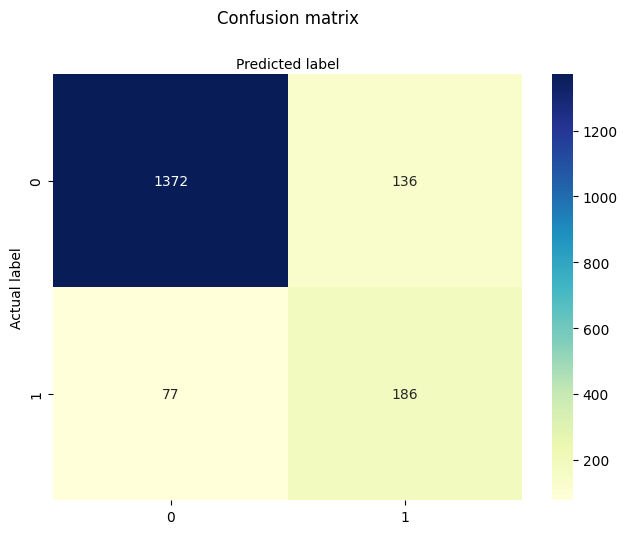

In [75]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Từ 4 chỉ số của **Confusion Matrix**, ta có các chỉ số để đánh giá **Confusion Matrix** bao gồm:
- ***Accuracy***: Độ chính xác dự báo trên toàn bộ dữ liệu
![!](acc.png)
- ***Precision***: Trong tất cả các dự đoán Positive được đưa ra, bao nhiêu dự đoán là chính xác?
![!](pre.png)
- ***Recall***: Trong tất cả các trường hợp Positive, bao nhiêu trường hợp đã được dự đoán chính xác?
![!](re.png)


In [76]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8797289666854884
Precision: 0.577639751552795
Recall: 0.7072243346007605


Ta có **độ chính xác** của mô hình là: **87.97%**. Tức trên tập test, mô hình đã dự đoán chính xác **87.97%** các trường hợp khách hàng rời bỏ (TP) và khách hàng không rời bỏ dịch vụ (FP).

**Precision** = **57.76%**: Tỷ lệ dự báo chính xác Positive trên tổng số trường hợp được dự báo là Positive. Tức là, trong tất cả các dự đoán khách hàng rời bỏ (Positive) được đưa ra thì có tới **57.76%** các trường hợp được dự đoán chính xác là sẽ rời bỏ dịch vụ, còn **42.24%** trường hợp còn lại mô hình đã dự đoán là rời bỏ, tuy nhiên thực tế các trường hợp này lại không rời bỏ.


**Recall** = **70.72%**: Tỷ lệ dự báo chính xác Positive trên thực tế. Tức là, trong tất cả các trường hợp khách hàng rời bỏ dịch vụ (Positive), mô hình chỉ có thể dự đoán được chính xác **70.72%** khách hàng rời bỏ dịch vụ. Còn **29.28%** khách hàng thực tế đã rời bỏ dịch vụ nhưng mô hình lại không dự đoán được.

***Từ các chỉ số trên, có thể đánh giá mô hình Hồi quy Logistic dự đoán tốt khách hàng có rời bỏ dịch vụ thẻ tín dụng của ngân hàng hay không.***


Ngoài ra do giữa **precision** và **recall** thì thường khó để lựa chọn xem chỉ số nào tốt hơn, ta có thể dùng **f1-score** là trung bình điều hoà đại diện cho cả **precision** và **recall**. Nếu ta coi cả 2 chỉ số có mức độ quan trọng như nhau thì ta có thể tính **f1-score** theo công thức:
![!](f1.png)
Một mô hình có chỉ số f1-score cao chỉ khi cả 2 chỉ số Precision và Recall đều cao. f1-score sẽ có khoảng giá trị từ 0 đến 1.  Trường hợp xấu nhất khi 1 trong hai chỉ số Precison và Recall bằng 0 sẽ kéo điểm f1-score về 0. Trường hợp tốt nhất khi cả điểm chỉ số đều đạt giá trị bằng 1, khi đó điểm f1-score sẽ là 1.


In [77]:
f1 = f1_score(y_test, y_pred)
print('f1-score: ',f1)

f1-score:  0.6358974358974359


Từ output, ta có thể thấy chỉ số **f1-score** cho mô hình là tốt với **0.636** điểm.

***Một lần nữa,*** có thể đánh giá mô hình là phù hợp và dự đoán tốt khách hàng rời bỏ dịch vụ.

### ROC Curve
ROC (Receiver operating characteristic) là một đồ thị được sử dụng khá phổ biến trong validation các model phân loại nhị phân. Đường cong này được tạo ra bằng cách biểu diễn tỷ lệ dự báo true positive rate (TPR) dựa trên tỷ lệ dự báo failse positive rate (FPR) tại các ngưỡng Threshold khác nhau. Cụ thể, có thể xem hình vẽ sau:
![!](tp.png)

Ứng với mỗi giá trị của threshold, ta sẽ thu được một cặp (FPR, TPR). Biểu diễn các điểm (FPR, TPR) trên đồ thị khi thay đổi threshold từ 0 tới 1 ta sẽ thu được một đường được gọi là Receiver Operating Characteristic curve hay ROC curve.



NameError: name 'auc' is not defined

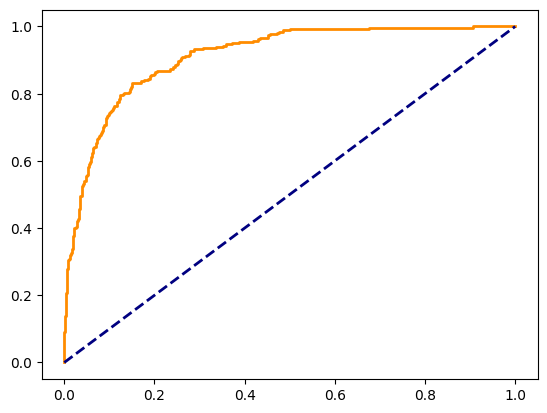

In [78]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Dựa trên **ROC curve**, ta có thể chỉ ra rằng một mô hình có hiệu quả hay không. Một mô hình hiệu quả khi có FPR thấp và TPR cao, tức tồn tại một điểm trên ROC curve gần với điểm có toạ độ (0, 1) trên đồ thị (góc trên bên trái). Curve càng gần thì mô hình càng hiệu quả.

***Có thể thấy,*** mô hình được nhóm phát triển là hiệu quả.

***Ngoài ra,***, có một thông số nữa dùng để đánh giá mà nhóm đã sử dụng ở trên được gọi là **Area Under the Curve** hay **AUC**. Đại lượng này chính là diện tích nằm dưới **ROC curve** màu cam(hoặc xanh, do nhóm vẽ 2 đường). Giá trị này là một số dương nhỏ hơn hoặc bằng 1. Giá trị này càng lớn thì mô hình càng tốt.

Khi chỉ số **AUC** = 1, có nghĩa là mô hình phân loại hoàn hảo. Khi số **AUC** = 0.5, mô hình phân loại không thực sự tốt. Từ hình vẽ, có thể tháy **AUC** của mô hình là **0.91**. NHư vậy, mô hình có sức mạnh phân loại tốt.

**Tóm lại**, với các chỉ số nhóm đã sử dụng để đánh giá độ chính xác của mô hình cũng như sự hiệu quả, sức mạnh phân loại của mô hình, nhóm nhận thấy mô hình được phát triển với **Hồi quy Logistic** là phù hợp, hiểu quả và tốt đối với bài toán dự đoán và phân loại khách hàng rời bỏ dịch vụ thẻ tín dụng hay không. 

# KẾT LUẬN
Với kết quả thu thập được từ Jupyter Notebook cho thấy hầu hết các biến đều giải thích cho mô hình, ngoại trừ một số biến đã bị loại bỏ do gây nhiễu và ảnh hưởng tới kết quả cuối cùng. Bên cạnh đó, vẫn còn một số vấn đề trong quá trình làm bài như một số mô hình cho ra độ chính xác chưa thực sự cao.

Như vậy, các bước trên đã giúp nhóm 03 trả lời vấn đề đặt ra ở đầu bài: “Một số yếu tố tác động tới việc khách hàng rời bỏ dịch vụ ngân hàng”. Cụ thể trong bài, nhóm đã nghiên cứu những yếu tố ảnh hưởng ít hay nhiều đến hành vi sử dụng dịch vụ của ngân hàng và ảnh hưởng như thế nào.

Điều này giúp ngân hàng có thể có một cái nhìn rõ hơn về phản ứng của khách hàng và các yếu tố tác động đến nó. Từ đó, có thể đưa ra những chiến lược thu hút và giữ chân khách hàng hợp lý để phát triển ngân hàng trong dài hạn.

Bản báo cáo trên được hoàn thành trên cơ sở tự nghiên cứu, tìm hiểu của các thành viên cùng với nền tảng kiến thức môn Lập trình trong phân tích dữ liệu kinh doanh. Dựa vào quá trình làm bài, nhóm có thể nắm rõ hơn về phân tích dữ liệu trong kinh doanh  và kiểm định đặc trưng có tính liên quan, áp dụng kiến thức về ngôn ngữ Python đã được học trên lớp vào kiến thức thực tế và rút ra được những mối tương quan ảnh hưởng lẫn nhau giữa các biến và hiện tượng kinh tế tài chính. Do vốn kiến thức và kĩ năng còn hạn chế nên chắc hẳn trong đề tài còn nhiều thiếu sót, chúng em kính mong nhận được sự chỉ bảo và nhận xét từ quý thầy cô đề đề tài của em được hoàn chỉnh hơn.